In [1]:
#Exploratory Data Analysis Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr

#ML Modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("/Users/oanottage/Desktop/BTS/Data Science Foundations/DSFinal/")

In [2]:
df = pd.read_csv("data/processed/kmeans_dataframe.csv")

In [3]:
df.head()

,rating,latitude,longitude,diversified_businesses,avg_ratings,avg_user_ratings_total,avg_price_leve,pcnt_businesses,has_website,Area_Eixample,Area_Gràcia
0,5.0,41.390142,2.169835,0.641975,3.685714,482.031746,0.134921,0.046409,1,0,0
1,4.4,41.388389,2.168717,0.641975,3.685714,482.031746,0.134921,0.046409,1,0,0
2,4.4,41.391270,2.172490,0.641975,3.685714,482.031746,0.134921,0.046409,1,0,0
3,4.1,41.389466,2.165171,0.641975,3.685714,482.031746,0.134921,0.046409,1,0,0
4,3.3,41.392059,2.173943,0.641975,3.685714,482.031746,0.134921,0.046409,0,0,0


## Building the KMeans Model

In [4]:
std_scaler = StandardScaler()
df_scaled = np.nan_to_num(std_scaler.fit_transform(df))

In [5]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

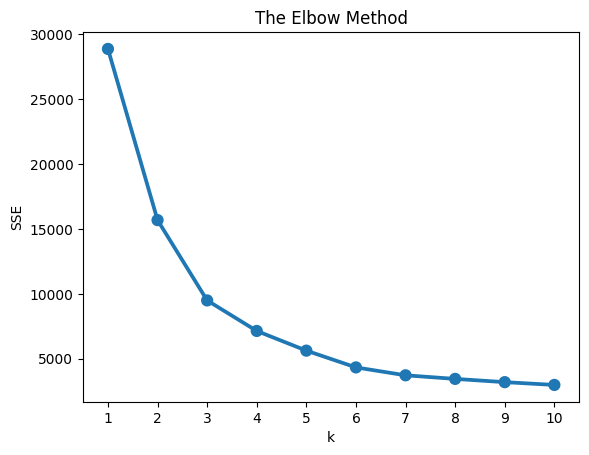

In [6]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("media/Elbow.png")

In [7]:
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [8]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [9]:
data = df.assign(ClusterLabel= model.labels_)

In [10]:
data.groupby("ClusterLabel").median()

,rating,latitude,longitude,diversified_businesses,avg_ratings,avg_user_ratings_total,avg_price_leve,pcnt_businesses,has_website,Area_Eixample,Area_Gràcia
ClusterLabel,,,,,,,,,,,
0,4.4,41.396502,2.163324,0.962963,3.635468,389.917898,0.156404,0.897238,1.0,1.0,0.0
1,4.5,41.403573,2.158305,0.641975,3.901961,387.686275,0.326797,0.056354,1.0,0.0,1.0
2,4.3,41.389592,2.169835,0.641975,3.685714,482.031746,0.134921,0.046409,1.0,0.0,0.0


In [11]:
data.to_csv("deliverables/lead_list_scored.csv",index=False)